___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import cufflinks as cf

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "notebook"



#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 110)
pd.set_option('display.max_rows', 110)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_male = pd.read_csv("ANSUR II MALE Public.csv", encoding="'ISO-8859-1" )
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [3]:
df_female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="'ISO-8859-1" )
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

## Explore Data

In [4]:
#  SubjectNumericRace and DODRace features can be the same ??

In [5]:
df_male.shape

(4082, 108)

In [6]:
df_female.shape

(1986, 108)

In [7]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [8]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [9]:
columns = pd.DataFrame({"df_male_columns": df_male.columns,
              "df_female_columns" : df_female.columns})
columns

,df_male_columns,df_female_columns
0,subjectid,SubjectId
1,abdominalextensiondepthsitting,abdominalextensiondepthsitting
2,acromialheight,acromialheight
3,acromionradialelength,acromionradialelength
4,anklecircumference,anklecircumference
5,axillaheight,axillaheight
6,balloffootcircumference,balloffootcircumference
7,balloffootlength,balloffootlength
8,biacromialbreadth,biacromialbreadth
9,bicepscircumferenceflexed,bicepscircumferenceflexed


In [10]:
df_male.rename(columns={"subjectid":"SubjectId"}, inplace=True)

In [11]:
df = pd.concat([df_male, df_female], ignore_index=True)
df

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [12]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    SubjectId                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum().sort_values(ascending=False)

Ethnicity                         4647
SubjectId                            0
radialestylionlength                 0
thighcircumference                   0
tenthribheight                       0
suprasternaleheight                  0
stature                              0
span                                 0
sleeveoutseam                        0
sleevelengthspinewrist               0
sittingheight                        0
shoulderlength                       0
shoulderelbowlength                  0
shouldercircumference                0
poplitealheight                      0
thumbtipreach                        0
palmlength                           0
overheadfingertipreachsitting        0
neckcircumferencebase                0
neckcircumference                    0
mentonsellionlength                  0
lowerthighcircumference              0
lateralmalleolusheight               0
lateralfemoralepicondyleheight       0
kneeheightsitting                    0
kneeheightmidpatella     

In [15]:
# we drop etnicity column bcs there are lots of null values

In [16]:
df["DODRace"].value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [17]:
df["DODRace"].value_counts(normalize=True)

1   0.625
2   0.214
3   0.112
4   0.031
6   0.010
5   0.008
8   0.000
Name: DODRace, dtype: float64

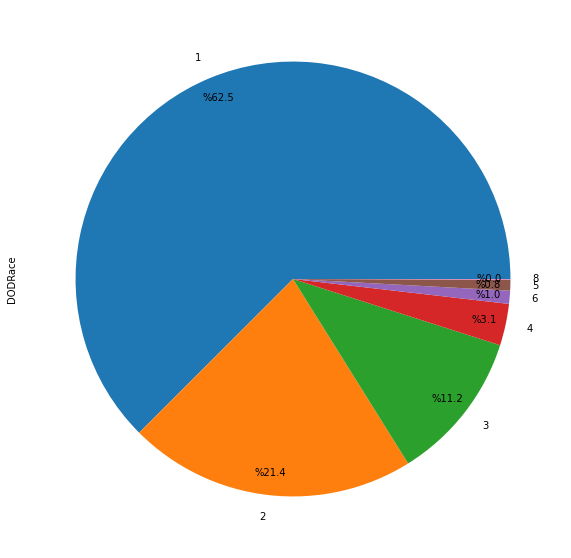

In [18]:
plt.figure(figsize=(10,10))
df["DODRace"].value_counts(normalize=True).plot(kind="pie", autopct="%%%.1f",pctdistance=0.9 );

In [19]:
df = df[(df["DODRace"] == 1)| (df["DODRace"] == 2) | (df["DODRace"] == 3)]
df.shape

(5769, 108)

In [20]:
df["DODRace"].value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [21]:
columns

,df_male_columns,df_female_columns
0,subjectid,SubjectId
1,abdominalextensiondepthsitting,abdominalextensiondepthsitting
2,acromialheight,acromialheight
3,acromionradialelength,acromionradialelength
4,anklecircumference,anklecircumference
5,axillaheight,axillaheight
6,balloffootcircumference,balloffootcircumference
7,balloffootlength,balloffootlength
8,biacromialbreadth,biacromialbreadth
9,bicepscircumferenceflexed,bicepscircumferenceflexed


In [22]:
drop_columns = ["SubjectId", "Date", "Installation", "WritingPreference", "Ethnicity",
               "Component", "Branch", "PrimaryMOS", "Weightlbs", "stature"]

In [23]:
df.drop(columns=drop_columns, inplace=True)

In [24]:
df.shape

(5769, 98)

In [25]:
len(df.select_dtypes("number").columns)

96

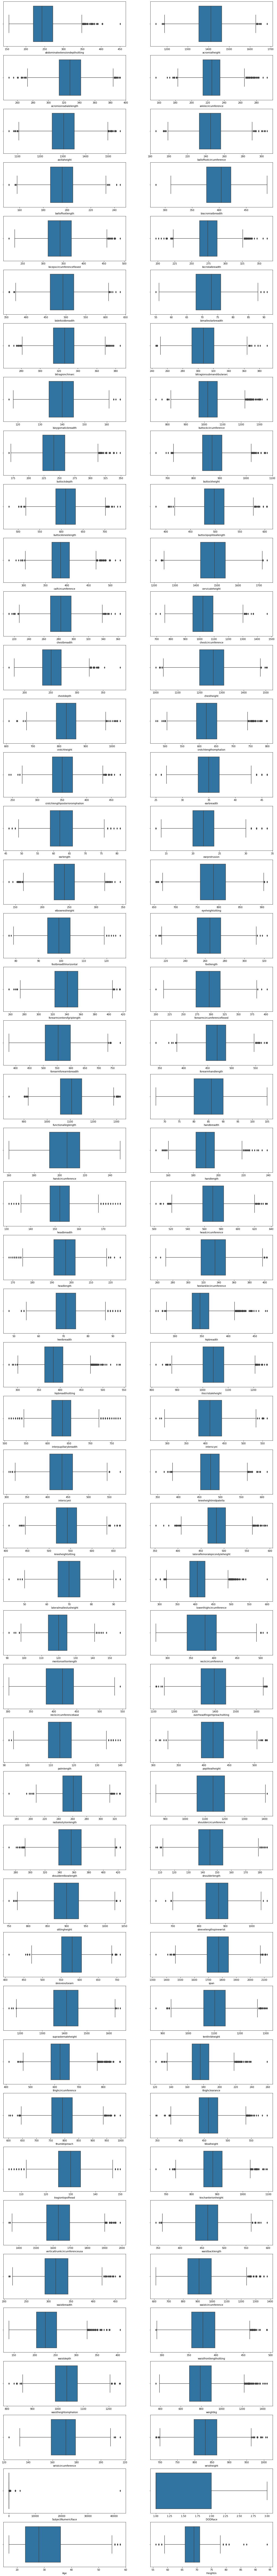

In [26]:
plt.figure(figsize=(20,200))
index=0
for col in df.select_dtypes("number"):
    index+=1
    plt.subplot(49,2,index)
    sns.boxplot(x=df[col])
    
    
# plt.figure(figsize=(10, 400))
# for i in range(len(df.select_dtypes("number").drop(columns="DODRace").columns)):
#     plt.subplot(97, 1, i+1)
#     sns.boxplot(data=df, x=df.select_dtypes("number").drop(columns="DODRace").columns[i])
#     plt.tight_layout()

In [27]:
df.SubjectNumericRace.value_counts()

1        3559
2        1025
3         541
31        159
8         106
51        102
21         60
23         34
28         26
251        20
41         19
18         16
61         15
25         13
38          9
351         9
231         6
42          6
62          6
35          5
235         4
43          3
63          3
218         3
431         2
2351        2
423         2
2518        2
4251        1
238         1
318         1
451         1
4           1
425         1
428         1
651         1
6           1
631         1
358         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [28]:
df.drop(columns=["SubjectNumericRace"], inplace=True)

In [29]:
df= df[df.weightkg < 1400]

In [30]:
df.weightkg = df.weightkg / 10

In [31]:
df.shape

(5765, 97)

In [32]:
for i in df.select_dtypes("O"):
    print(f"There are {df[i].nunique()} unique values in {i} column")

There are 2 unique values in Gender column
There are 136 unique values in SubjectsBirthLocation column


In [33]:
df.Gender = df.Gender.map({"Male": 1, "Female": 0})

In [34]:
df.Gender.value_counts()

1    3895
0    1870
Name: Gender, dtype: int64

In [35]:
df["DODRace"] = df.DODRace.map({1: "White", 2: "Black", 3: "Hispanic"})

In [36]:
df.reset_index(drop=True,inplace=True)

In [37]:
def color_red(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'


pd.DataFrame(df.corr()).style.applymap(color_red)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting


<AxesSubplot:>

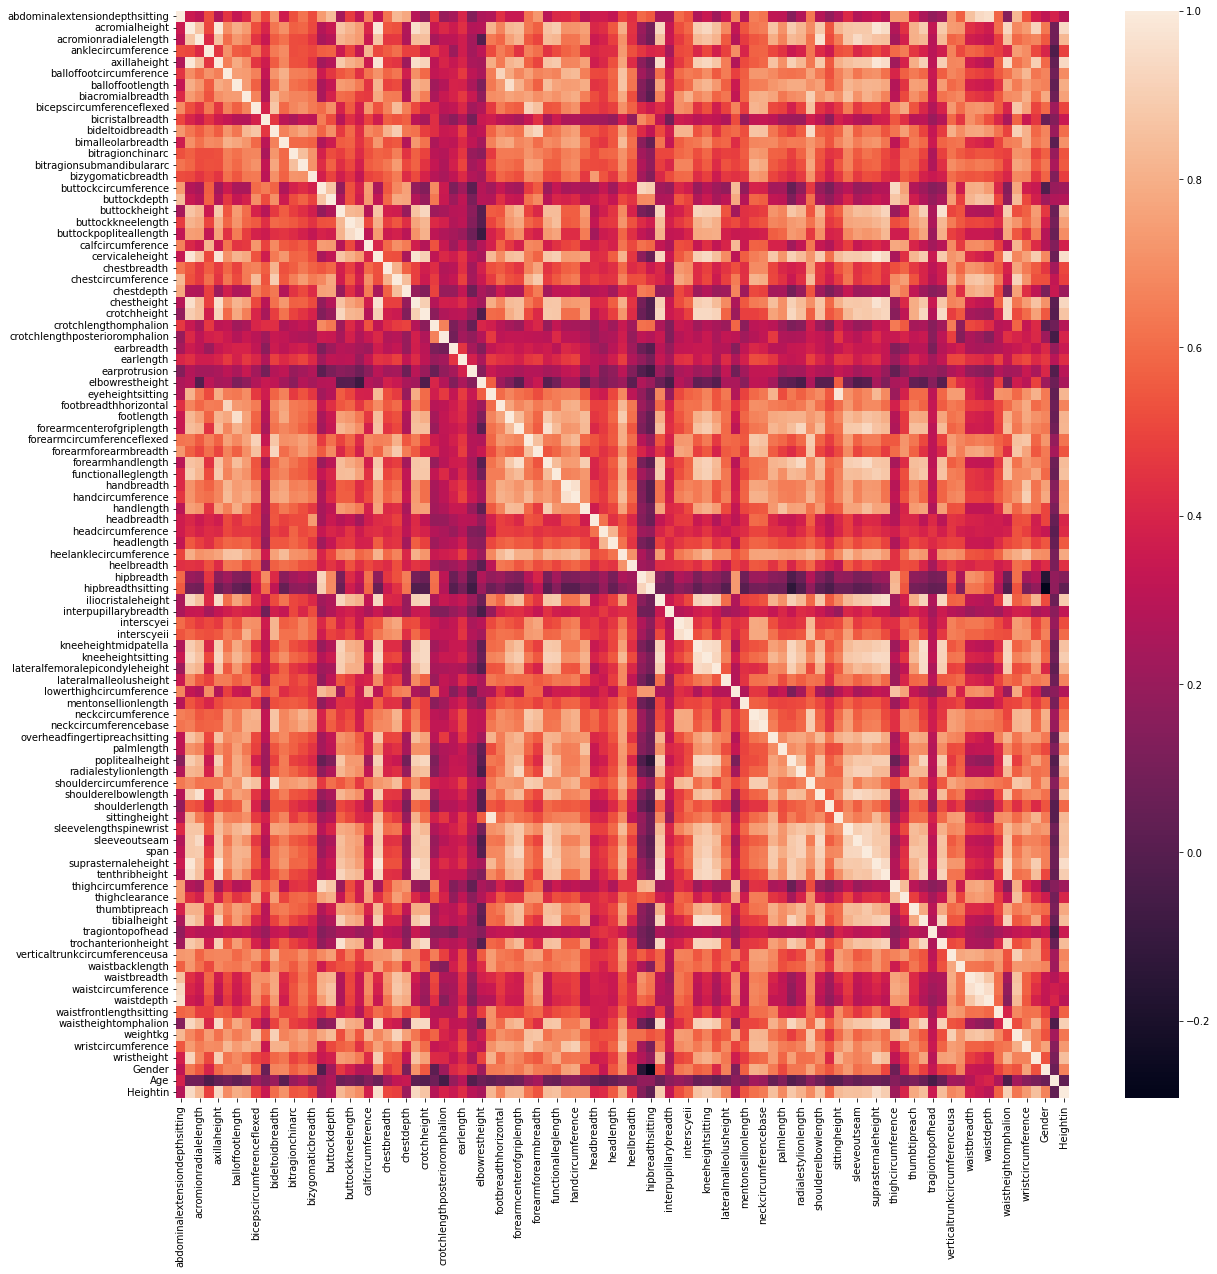

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [39]:
X = df.drop(columns="DODRace")
y = df["DODRace"]

In [40]:
cat = X.select_dtypes("O").columns
cat

Index(['SubjectsBirthLocation'], dtype='object')

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [42]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4612, 96)
Train target shape   :  (4612,)
Test features shape  :  (1153, 96)
Test target shape    :  (1153,)


In [43]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
column_trans = make_column_transformer((encoder, cat), remainder=MinMaxScaler())


In [44]:
df["DODRace"].value_counts()

White       3789
Black       1298
Hispanic     678
Name: DODRace, dtype: int64

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [45]:
from sklearn.linear_model import  LogisticRegression
from sklearn.pipeline import Pipeline

log_model = LogisticRegression()

pipe_log_model = Pipeline([("OneHotEncoder", column_trans),("log_pipe", LogisticRegression(random_state=101))])

In [46]:
pipe_log_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['SubjectsBirthLocation'], dtype='object'))])),
                ('log_pipe', LogisticRegression(random_state=101))])

In [47]:
y_pred = pipe_log_model.predict(X_test)
y_train_pred = pipe_log_model.predict(X_train)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score, f1_score

In [49]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [50]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[242   3  15]
 [ 10  68  57]
 [ 10  16 732]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93       260
    Hispanic       0.78      0.50      0.61       135
       White       0.91      0.97      0.94       758

    accuracy                           0.90      1153
   macro avg       0.87      0.80      0.83      1153
weighted avg       0.90      0.90      0.90      1153


Train_Set
[[ 953   11   74]
 [  26  316  201]
 [  25   60 2946]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.93      1038
    Hispanic       0.82      0.58      0.68       543
       White       0.91      0.97      0.94      3031

    accuracy                           0.91      4612
   macro avg       0.89      0.82      0.85      4612
weighted avg       0.91      0.91      0.91      4612



In [51]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import  GridSearchCV
model = Pipeline([("OneHotEncoder", column_trans),("log_pipe", LogisticRegression(class_weight="balanced",random_state=101))])

scores = cross_validate(model, X_train, y_train, cv = 10, scoring = ["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"])
df_scores = pd.DataFrame(scores, index= range(1,11))
df_scores.mean()[2:]

test_accuracy             0.858
test_precision_weighted   0.889
test_recall_weighted      0.858
test_f1_weighted          0.868
dtype: float64

### Logistic Model GridsearchCV

In [52]:
model = Pipeline([("OneHotEncoder", column_trans),("log_pipe", LogisticRegression(class_weight="balanced", random_state=101))])
param_grid = {"log_pipe__C" : [0.1,1],
              "log_pipe__penalty": ["l1", "l2"],
              "log_pipe__solver": ["lbfgs", "liblinear"]}


log_model_grid = GridSearchCV(model, param_grid, cv=5,verbose=2, scoring="accuracy", n_jobs=-1)

In [53]:
log_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['SubjectsBirthLocation'], dtype='object'))])),
                                       ('log_pipe',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log_pipe__C': [0.1, 1],
                         'log_pipe__penalty': ['l1', 'l2'],
                         'log_pipe__solver': ['lbfgs', 'liblinear']},
             scoring='accuracy', verbose=2)

In [54]:
log_model_grid.best_score_

0.8980940204886922

In [55]:
log_model_grid.best_params_

{'log_pipe__C': 1, 'log_pipe__penalty': 'l2', 'log_pipe__solver': 'liblinear'}

In [56]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['SubjectsBirthLocation'], dtype='object'))])),
                ('log_pipe',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=101, solver='liblinear'))])

In [57]:
y_pred = log_model_grid.predict(X_test)
y_train_pred = log_model_grid.predict(X_train)

In [58]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[243   4  13]
 [  9  86  40]
 [ 17  38 703]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.92       260
    Hispanic       0.67      0.64      0.65       135
       White       0.93      0.93      0.93       758

    accuracy                           0.90      1153
   macro avg       0.84      0.83      0.83      1153
weighted avg       0.89      0.90      0.89      1153


Train_Set
[[ 969   19   50]
 [  29  375  139]
 [  40  138 2853]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1038
    Hispanic       0.70      0.69      0.70       543
       White       0.94      0.94      0.94      3031

    accuracy                           0.91      4612
   macro avg       0.86      0.86      0.86      4612
weighted avg       0.91      0.91      0.91      4612



###  Evaluating ROC Curves and AUC

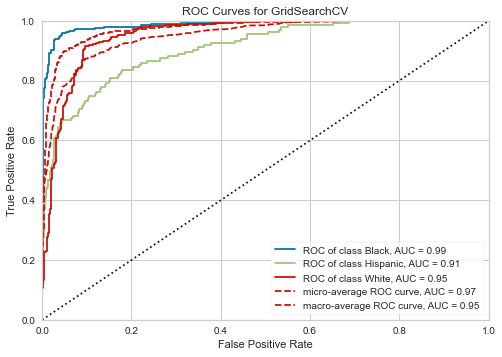

In [59]:
from yellowbrick.classifier import ROCAUC
model = log_model_grid
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show();  

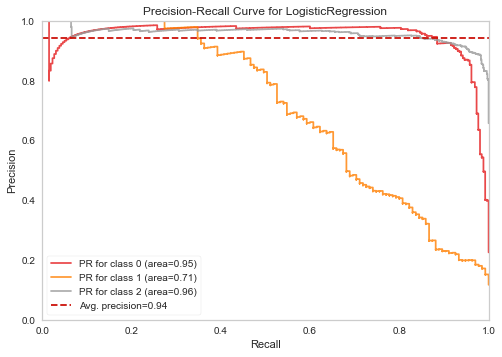

In [60]:
from yellowbrick.classifier import PrecisionRecallCurve

model = Pipeline([("OneHotEncoder", column_trans),("log_pipe", LogisticRegression(random_state=101))])

viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1" )
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();



In [61]:
log_accuracy_test = accuracy_score(y_test, y_pred)
log_accuracy_train = accuracy_score(y_train, y_train_pred)

log_precision_test = precision_score(y_test, y_pred, average='weighted')
log_precision_train = precision_score(y_train, y_train_pred, average='weighted')

log_recall_test = recall_score(y_test, y_pred, average='weighted')
log_recall_train = recall_score(y_train, y_train_pred, average='weighted')

log_f1_test = f1_score(y_test, y_pred, average='weighted')
log_f1_train = f1_score(y_train, y_train_pred, average='weighted')


log_accuracy_test, log_precision_test, log_recall_test,  log_f1_test

(0.8950563746747615,
 0.8936971394931698,
 0.8950563746747615,
 0.8942614255586145)

## 2. SVC

### Vanilla SVC model 

In [62]:
from sklearn.svm import SVC

In [63]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [64]:
pipe_svc_model = Pipeline([("OneHotEncoder", column_trans),("svc_pipe", SVC(class_weight="balanced", random_state=101))])
pipe_svc_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['SubjectsBirthLocation'], dtype='object'))])),
                ('svc_pipe', SVC(class_weight='balanced', random_state=101))])

In [65]:
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[241   9  10]
 [  8  99  28]
 [ 18 112 628]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.91       260
    Hispanic       0.45      0.73      0.56       135
       White       0.94      0.83      0.88       758

    accuracy                           0.84      1153
   macro avg       0.77      0.83      0.78      1153
weighted avg       0.88      0.84      0.85      1153


Train_Set
[[ 960   40   38]
 [  19  461   63]
 [  48  413 2570]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.93      1038
    Hispanic       0.50      0.85      0.63       543
       White       0.96      0.85      0.90      3031

    accuracy                           0.87      4612
   macro avg       0.80      0.87      0.82      4612
weighted avg       0.90      0.87      0.88      4612



In [66]:
model = Pipeline([("OneHotEncoder", column_trans),("svc_pipe", SVC(class_weight="balanced", random_state=101))])

scores = cross_validate(model, X_train, y_train, cv=10, scoring=["precision_weighted", "recall_weighted", "f1_weighted"])
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_precision_weighted   0.883
test_recall_weighted      0.844
test_f1_weighted          0.856
dtype: float64

###  SVC Model GridsearchCV

In [67]:
model = Pipeline([("OneHotEncoder", column_trans),("svc_pipe", SVC(class_weight="balanced", random_state=101))])

param_grid = {"svc_pipe__C" : [1,2, 3],
              "svc_pipe__gamma": ["scale", "auto", 1, 0.1]}

svc_model_grid = GridSearchCV(model, param_grid, verbose=3, scoring="accuracy", n_jobs=-1)

In [68]:
svc_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['SubjectsBirthLocation'], dtype='object'))])),
                                       ('svc_pipe',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc_pipe__C': [1, 2, 3],
                         'svc_pipe__gamma': ['scale', 'auto', 1, 0.1]},
             scoring='accuracy', verbose=3)

In [69]:
svc_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['SubjectsBirthLocation'], dtype='object'))])),
                ('svc_pipe',
                 SVC(C=3, class_weight='balanced', gamma=1, random_state=101))])

In [70]:
svc_model_grid.best_params_

{'svc_pipe__C': 3, 'svc_pipe__gamma': 1}

In [71]:
svc_model_grid.best_score_

0.8677351276019205

In [72]:
y_pred = svc_model_grid.predict(X_test)
y_train_pred = svc_model_grid.predict(X_train)

In [73]:
eval_metric(svc_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[227   4  29]
 [  9  62  64]
 [ 12  22 724]]
              precision    recall  f1-score   support

       Black       0.92      0.87      0.89       260
    Hispanic       0.70      0.46      0.56       135
       White       0.89      0.96      0.92       758

    accuracy                           0.88      1153
   macro avg       0.84      0.76      0.79      1153
weighted avg       0.87      0.88      0.87      1153


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    2 3029]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3031

    accuracy                           1.00      4612
   macro avg       1.00      1.00      1.00      4612
weighted avg       1.00      1.00      1.00      4612



### Evaluating ROC Curves and AUC

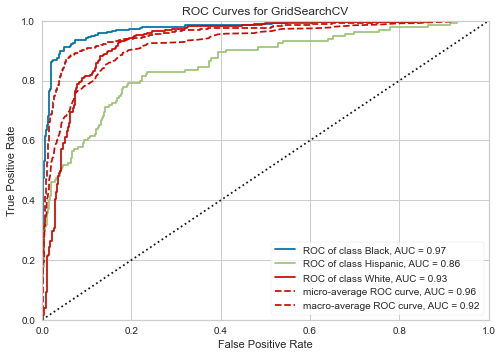

In [74]:
from yellowbrick.classifier import ROCAUC
model = svc_model_grid
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(); 

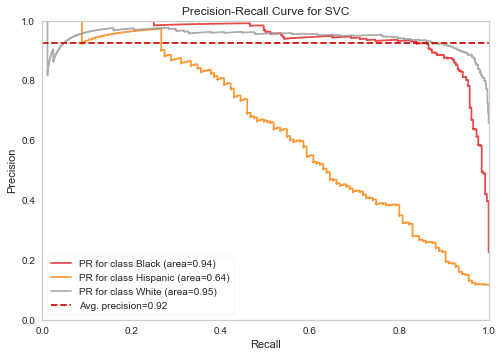

In [75]:
model = Pipeline([("OneHotEncoder", column_trans),("svc_pipe", SVC(C=3, gamma=1, class_weight="balanced", random_state=101))])

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [76]:
SVC_accuracy_test = accuracy_score(y_test, y_pred)
SVC_accuracy_train = accuracy_score(y_train, y_train_pred)

SVC_precision_test = precision_score(y_test, y_pred, average='weighted')
SVC_precision_train = precision_score(y_train, y_train_pred, average='weighted')

SVC_recall_test = recall_score(y_test, y_pred, average='weighted')
SVC_recall_train = recall_score(y_train, y_train_pred, average='weighted')


SVC_f1_test = f1_score(y_test, y_pred, average='weighted')
SVC_f1_train = f1_score(y_train, y_train_pred, average='weighted')

SVC_accuracy_test, SVC_precision_test, SVC_recall_test, SVC_f1_test, 

(0.8785776235906332,
 0.8714774862125795,
 0.8785776235906332,
 0.8710392016106944)

## 3. RF

### Vanilla RF Model

In [77]:
# Since we applied ordinal encoder on splitted data before implementing Logistic model, we should reset train, test split operation. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [78]:
cat = X_train.select_dtypes("object").columns
cat

Index(['SubjectsBirthLocation'], dtype='object')

In [79]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
column_trans = make_column_transformer((encoder, cat), remainder='passthrough')

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)

pipe_rf_model = Pipeline([("OneHotEncoder", column_trans),("RF_model", rf_model)])

pipe_rf_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['SubjectsBirthLocation'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [81]:
eval_metric(pipe_rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[179   1  80]
 [ 10   2 123]
 [ 10   3 745]]
              precision    recall  f1-score   support

       Black       0.90      0.69      0.78       260
    Hispanic       0.33      0.01      0.03       135
       White       0.79      0.98      0.87       758

    accuracy                           0.80      1153
   macro avg       0.67      0.56      0.56      1153
weighted avg       0.76      0.80      0.75      1153


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3031]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3031

    accuracy                           1.00      4612
   macro avg       1.00      1.00      1.00      4612
weighted avg       1.00      1.00      1.00      4612



In [82]:
model = Pipeline([("OneHotEncoder", column_trans),("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101) )])


scores = cross_validate(model, X_train, y_train, cv=10, scoring = ["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"], error_score="raise",)
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]


test_accuracy             0.806
test_precision_weighted   0.810
test_recall_weighted      0.806
test_f1_weighted          0.759
dtype: float64

### RF Model GridsearchCV

In [83]:
model = Pipeline([("OrdinalEncoder", column_trans),("RF_model", rf_model)])

param_grid = {"RF_model__criterion" : ["gini", "entropy"],
              "RF_model__max_depth": [8, 9, 10], 
              "RF_model__n_estimators": [300, 400]}

rf_model_grid = GridSearchCV(model, param_grid, verbose=3, scoring="accuracy", n_jobs=-1, )

In [84]:
rf_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['SubjectsBirthLocation'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__criterion': ['gini', 'entropy'],
                         'RF_model__max_depth': [8, 9, 10],
                         'RF_model__n_estimators': [300, 400]},
             scoring='accuracy', verbose=3)

In [85]:
rf_model_grid.best_score_

0.8211182999884843

In [86]:
rf_model_grid.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['SubjectsBirthLocation'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=10,
                                        n_estimators=300, random_state=101))])

In [87]:
rf_model_grid.best_params_

{'RF_model__criterion': 'entropy',
 'RF_model__max_depth': 10,
 'RF_model__n_estimators': 300}

In [88]:
y_pred = rf_model_grid.predict(X_test)
y_train_pred = rf_model_grid.predict(X_train)

In [89]:
eval_metric(rf_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[199   7  54]
 [ 12  34  89]
 [ 19  31 708]]
              precision    recall  f1-score   support

       Black       0.87      0.77      0.81       260
    Hispanic       0.47      0.25      0.33       135
       White       0.83      0.93      0.88       758

    accuracy                           0.82      1153
   macro avg       0.72      0.65      0.67      1153
weighted avg       0.80      0.82      0.80      1153


Train_Set
[[1028    0   10]
 [   0  530   13]
 [   1    8 3022]]
              precision    recall  f1-score   support

       Black       1.00      0.99      0.99      1038
    Hispanic       0.99      0.98      0.98       543
       White       0.99      1.00      0.99      3031

    accuracy                           0.99      4612
   macro avg       0.99      0.99      0.99      4612
weighted avg       0.99      0.99      0.99      4612



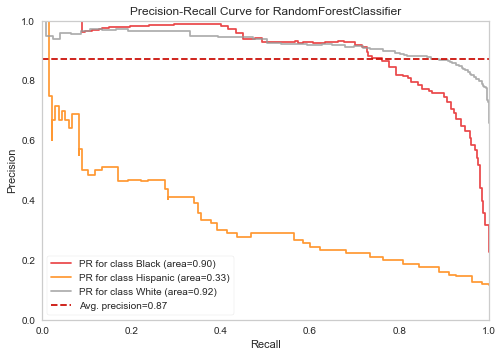

In [90]:
model = Pipeline([("OrdinalEncoder", column_trans),("RF_model", rf_model)])

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [91]:
RF_accuracy_test = accuracy_score(y_test, y_pred)
RF_accuracy_train = accuracy_score(y_train, y_train_pred)

RF_precision_test = precision_score(y_test, y_pred, average='weighted')
RF_precision_train = precision_score(y_train, y_train_pred, average='weighted')

RF_recall_test = recall_score(y_test, y_pred, average='weighted')
RF_recall_train = recall_score(y_train, y_train_pred, average='weighted')

RF_f1_test = f1_score(y_test, y_pred, average='weighted')
RF_f1_train = f1_score(y_train, y_train_pred, average='weighted')

RF_accuracy_test, RF_accuracy_train, RF_f1_test, RF_f1_train

(0.8161318300086731,
 0.9930615784908933,
 0.8001814289343593,
 0.9930538491905081)

## 4. XGBoost

### Vanilla XGBoost Model

In [92]:
from xgboost import XGBClassifier

In [93]:
pipe_xgb_model = Pipeline([("OrdinalEncoder", column_trans),("xgb_model", XGBClassifier(random_state=101))])

pipe_xgb_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['SubjectsBirthLocation'], dtype='object'))])),
                ('xgb_model',
                 XGBClassifier(objective='multi:softprob', random_state=101))])

In [94]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.50720334, 0.50720334, 2.83118478, ..., 0.50720334, 0.50720334,
       0.50720334])

In [95]:
comp = pd.DataFrame(classes_weights)

comp["label"] = y_train.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0    
Black     1.481    1038
Hispanic  2.831     543
White     0.507    3031
Name: 0, dtype: int64

In [96]:
pipe_xgb_model.fit(X_train,y_train, xgb_model__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore, we need to assign the weight of each class to its instances, which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['SubjectsBirthLocation'], dtype='object'))])),
                ('xgb_model',
                 XGBClassifier(objective='multi:softprob', random_state=101))])

In [97]:
eval_metric(pipe_xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[227  17  16]
 [ 12  84  39]
 [ 35 103 620]]
              precision    recall  f1-score   support

       Black       0.83      0.87      0.85       260
    Hispanic       0.41      0.62      0.50       135
       White       0.92      0.82      0.87       758

    accuracy                           0.81      1153
   macro avg       0.72      0.77      0.74      1153
weighted avg       0.84      0.81      0.82      1153


Train_Set
[[ 974   22   42]
 [  15  454   74]
 [  95  304 2632]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92      1038
    Hispanic       0.58      0.84      0.69       543
       White       0.96      0.87      0.91      3031

    accuracy                           0.88      4612
   macro avg       0.81      0.88      0.84      4612
weighted avg       0.90      0.88      0.89      4612



In [98]:
model = Pipeline([("OrdinalEncoder", column_trans),("xgb_model", XGBClassifier(random_state=101))])

scores = cross_validate(model, X_train, y_train, cv=10, scoring=["accuracy", "precision_micro", "recall_micro", "f1_micro"], n_jobs=-1 )

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.854
test_precision_micro   0.854
test_recall_micro      0.854
test_f1_micro          0.854
dtype: float64

### XGBoost Model GridsearchCV

In [99]:
model = Pipeline([("OrdinalEncoder", column_trans),("xgb_model", XGBClassifier(random_state=101))])

param_grid = {"xgb_model__learning_rate" :[0.1, 0.5],
              "xgb_model__max_depth": [3,4,5],
              "xgb_model__n_estimators": [100, 200],
               "xgb_model__subsample":[0.8, 1]}

xgb_model_grid = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", verbose=2, n_jobs=-1)


In [100]:
xgb_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['SubjectsBirthLocation'], dtype='object'))])),
                                       ('xgb_model',
                                        XGBClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'xgb_model__learning_rate': [0.1, 0.5],
                         'xgb_model__max_depth': [3, 4, 5],
                         'xgb_model__n_estimators': [100, 200],
                         'xgb_model__subsample': [0.8, 1]},
             scoring='accuracy', verbose=2)

In [101]:
xgb_model_grid.best_score_

0.8722873869279418

In [102]:
xgb_model_grid.best_params_

{'xgb_model__learning_rate': 0.5,
 'xgb_model__max_depth': 5,
 'xgb_model__n_estimators': 200,
 'xgb_model__subsample': 0.8}

In [103]:
xgb_model_grid.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['SubjectsBirthLocation'], dtype='object'))])),
                ('xgb_model',
                 XGBClassifier(learning_rate=0.5, max_depth=5, n_estimators=200,
                               objective='multi:softprob', random_state=101,
                               subsample=0.8))])

In [104]:
y_pred = xgb_model_grid.predict(X_test)
y_train_pred = xgb_model_grid.predict(X_train)

In [105]:
eval_metric(xgb_model_grid,X_train, y_train, X_test, y_test)

Test_Set
[[231   6  23]
 [ 10  50  75]
 [ 12  13 733]]
              precision    recall  f1-score   support

       Black       0.91      0.89      0.90       260
    Hispanic       0.72      0.37      0.49       135
       White       0.88      0.97      0.92       758

    accuracy                           0.88      1153
   macro avg       0.84      0.74      0.77      1153
weighted avg       0.87      0.88      0.87      1153


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3031]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3031

    accuracy                           1.00      4612
   macro avg       1.00      1.00      1.00      4612
weighted avg       1.00      1.00      1.00      4612



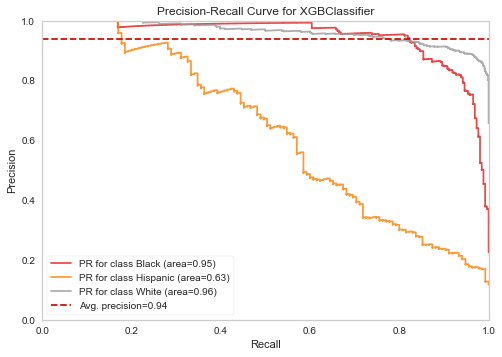

In [106]:
model = Pipeline([("OrdinalEncoder", column_trans),("xgb_model", XGBClassifier(max_depth=4, n_estimators=200, subsample=0.8))])

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [107]:
xgb_accuracy_test = accuracy_score(y_test, y_pred)
xgb_accuracy_train = accuracy_score(y_train, y_train_pred)

xgb_precision_test = precision_score(y_test, y_pred, average='weighted')
xgb_precision_train = precision_score(y_train, y_train_pred, average='weighted')

xgb_recall_test = recall_score(y_test, y_pred, average='weighted')
xgb_recall_train = recall_score(y_train, y_train_pred, average='weighted')

xgb_f1_test = f1_score(y_test, y_pred, average='weighted')
xgb_f1_train = f1_score(y_train, y_train_pred, average='weighted')

xgb_accuracy_test, xgb_precision_test, xgb_recall_test, xgb_f1_test, 

(0.8794449262792715,
 0.8706212456532199,
 0.8794449262792715,
 0.8670024971679686)

# Comparing

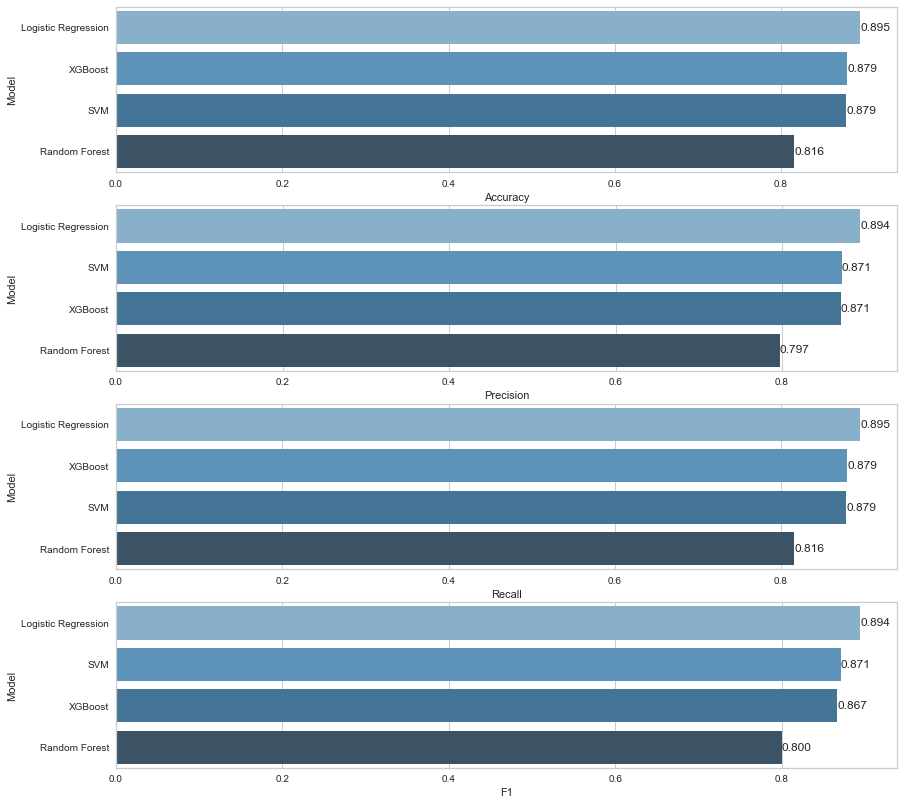

In [108]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                         "Accuracy": [log_accuracy_test, SVC_accuracy_test, RF_accuracy_test, xgb_accuracy_test],
                        "Precision" : [log_precision_test, SVC_precision_test, RF_precision_test, xgb_precision_test],
                        "Recall": [log_recall_test, SVC_recall_test, RF_recall_test, xgb_recall_test],
                        "F1": [log_f1_test, SVC_f1_test, RF_f1_test, xgb_f1_test] })

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,14))
plt.subplot(411)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Precision", ascending=False)
ax=sns.barplot(x="Precision", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(414)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

---
---

---
---

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___